## Challenge Exercise 1 (CE1)

### Due on 9/2/25 @ 11:55 pm EST (see Canvas Assignment)

****

## Collaboration policy

This is a group assignment. The maximum number of students in a group is four. There are no existing group assignments, so you are free to organize yourselves. Please be welcoming and kind, and invite students you may not know well (i.e., be a good classmate). If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.

In the markdown cell below, put the full name of each person in your group.

### Team members

1. Yuyang Deng
2. Lingxiao Han
3. Zhuoran You

****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.




****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. dyy12 730660498
2. hanlingx 730663675
3. youz and 730679279

****

## Python modules

All the Python modules needed to complete this CE are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

****

## Image Gradient using a first-order derivative.

The Laplacian $\nabla H = \frac{\partial H}{\partial x} + \frac{\partial H}{\partial y }$ performs a partial first-order derivative in both the x-direction $\frac{\partial H}{\partial x}$ and the y-direction $\frac{\partial H}{\partial y}$ where **H** is a matrix (or image), $x$ is a column in the matrix, and $y$ is a row in the matrix (<ins>Note</ins>: this may be confusing, the image coordinate space is the opposite of a Cartesian one).

The partial first-order derivatives are found using:

$$G_x = \frac{\partial H}{\partial x} = H(y, x+1) - H(y, x-1)$$

and

$$G_y = \frac{\partial H}{\partial y } = H(y+1,x) - H(y-1,x)$$

We can then find the magnitude of the gradient

$$| \nabla H(y,x) | = \sqrt{ G_x^2 + G_y^2 }$$

and the angle of the gradient

$$ \Theta = tan^{-1} \frac{G_y}{G_x} $$

<ins><strong>Hint</strong></ins>: If $H(y+1)$ exceeds the maximum size (e.g., 200) or $H(y-1)$ exceeds the minimum size (e.g., -1), then use $H(y)$. The same rule applies to $H(x+1)$ and $H(x-1)$.


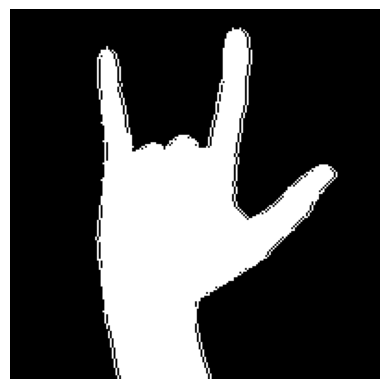

In [2]:
# --------------------------------------
# do not modify this code
filename = "bhand.png"
I = plt.imread( filename )

# H is a (200,200) binary image. This means each pixel value 
# will be 0 or 1.
H = np.array( I[:,:,0] ).astype(np.uint8)
plt.imshow( H, cmap="gray" )
plt.axis("off")
plt.show()
# ---------------------------------------


**P1** (10 Points). In the coding cell below, write a small program that computes the magnitude of the gradient (defined above) for each element in **H**. Your program will generate a new *gradient magnitude* matrix called **Hm** that only depicts the hand's contour. Display the **Hm** matrix to visualize the hand contour.

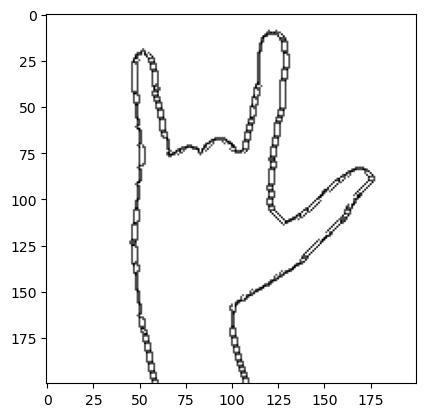

In [3]:
# --------------------------------------
# Add your P1 coding solution here
# --------------------------------------

y,x = H.shape

# Hm is a 200x200 matrix and all
# the element values are set to zero
Hm = np.zeros((y, x))

def gx(x, y, H) -> float:
    lower_x = x - 1
    upper_x = x + 1

    if upper_x >= 200:
        upper_x = x
    if lower_x <= -1:
        lower_x = x 

    return float(H[y, upper_x]) - float(H[y, lower_x])

def gy(x, y, H) -> float:
    lower_y = y - 1
    upper_y = y + 1

    if upper_y >= 200:
        upper_y = y
    if lower_y <= -1:
        lower_y = y
    
    return float(H[upper_y, x]) - float(H[lower_y, x])

for i in range(y):
    for j in range(x):
        Gx: float = gx(j, i, H)
        Gy: float = gy(j, i, H)
        Hm[i][j] = float(np.sqrt(Gx ** 2 + Gy ** 2))
        
plt.imshow(Hm, cmap= "binary")


**P2** (10 Points). In the coding cell below, write a small program that computes the angle of the gradient (defined above) for each element in **H**. Your program will generate a new *gradient angle* matrix called **Ha** that only depicts the hand's contour. Display the **Ha** matrix to visualize the hand contour.

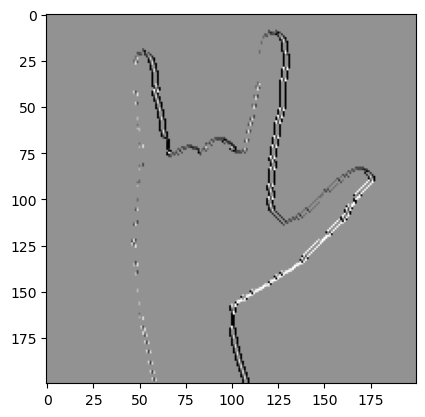

In [4]:
# --------------------------------------
# Add your P2 coding solution here
# --------------------------------------

y,x = H.shape

# Ha is a 200x200 matrix and all
# the element values are set to zero
Ha = np.zeros((y, x))

def gx(x, y, H) -> float:
    lower_x = x - 1
    upper_x = x + 1

    if upper_x >= 200:
        upper_x = x
    if lower_x <= -1:
        lower_x = x

    return float(H[y, upper_x]) - float(H[y, lower_x])

def gy(x, y, H) -> float:
    lower_y = y - 1
    upper_y = y + 1

    if upper_y >= 200:
        upper_y = y
    if lower_y < -1:
        lower_y = y

    return float(H[upper_y, x]) - float(H[lower_y, x])

for i in range(y):
    for j in range(x):
        Gx = gx(j, i, H)
        Gy = gy(j, i, H)
        Ha[i][j] =float(np.arctan2(Gy, Gx))

plt.imshow(Ha, cmap = "binary")

****

## Image gradient using a second-order derivative.

The Laplacian $\nabla^2 H = \frac{\partial^2H}{\partial x^2} + \frac{\partial^2H}{\partial y^2}$ performs a partial second-order derivative in both the x-direction $\frac{\partial^2H}{\partial x^2}$ and the y-direction $\frac{\partial^2H}{\partial y^2}$. 

The partial second-order derivatives are found using:

$$\frac{\partial^2H}{\partial x^2} = H(y,x+1) + H(y,x-1) - 2H(y,x)$$
and
$$\frac{\partial^2H}{\partial y^2} = H(y+1,x) + H(y-1,x) - 2H(y,x)$$

In general, we combine these two second-order derivatives

$$\nabla^2 H(y,x) = H(y,x+1) + H(y,x-1) + H(y+1,x) + H(y-1,x) - 4H(y,x)$$

(10 Points). In the coding cell below, write a small program that computes the magnitude of the gradient (defined above) for each element in **H**. Your program will generate a new *gradient magnitude* matrix called **Hmm** that only depicts the hand's contour. Display the **Hmm** matrix to visualize the hand contour.


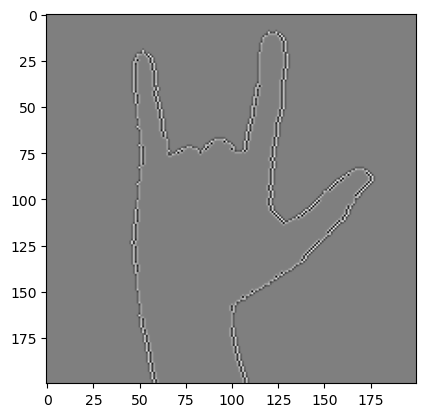

In [5]:
# --------------------------------------
# Add your coding solution here
# --------------------------------------

y,x = H.shape

# Hmm is a 200x200 matrix and all
# the element values are set to zero
Hmm = np.zeros((y, x))

def snd_derivative_x(x, y, H) -> float:
    lower_x = x - 1
    upper_x = x + 1

    if upper_x >= 200:
        upper_x = x
    if lower_x <= 0:
        lower_x = x

    return float(H[y, upper_x] + H[y, lower_x] - 2 * H[y, x])

def snd_derivative_y(x, y, H) -> float:
    lower_y = y - 1
    upper_y = y + 1

    if upper_y >= 200:
        upper_y = y
    if lower_y <= 0:
        lower_y = y

    return float(H[upper_y, x] + H[lower_y, x] - 2 * H[y, x])

for i in range(y):
    for j in range(x):
        ddx = snd_derivative_x(j, i, H)
        ddy = snd_derivative_y(j, i, H)
        Hmm[i][j] =ddx + ddy


plt.imshow(Hmm, cmap = "binary")